In [1]:
import pytorch_lightning
from monai.utils import set_determinism
from monai.transforms import (
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    ScaleIntensityRanged,
    Spacingd,
    EnsureType,
)
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.metrics import DiceMetric
from monai.losses import DiceLoss
from monai.inferers import sliding_window_inference
from monai.data import CacheDataset, list_data_collate, decollate_batch, DataLoader
from monai.config import print_config
from monai.apps import download_and_extract
import torch
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
import glob
import random
import nibabel as nib
import numpy as np
import SimpleITK as sitk
from math import floor, ceil

In [2]:
import sys
sys.path.append('../')
sys.path.insert(0, '../config/')
from config import Configuration
config = Configuration()
print(config.init['PROJECT_NAME'])
print(config.dataset['IMAGE_ROOT'])


FistulaSegmentation
/home/sasank/Dropbox (UFL)/FistulaData/Segmentations/


In [3]:
config.etl['DATA_DIR'] = '/home/sasank/Documents/GitRepos/Fistula-Segmentation/data/'

from net import SegmentationNet
net = SegmentationNet(config=config)

In [4]:
net.setup('fit')
train_ds = net.train_ds

/home/sasank/miniconda3/envs/fistula/lib/python3.10/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


Loading dataset: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


In [5]:
train_loader = net.train_dataloader()

In [21]:
test_img = train_loader.dataset[0][0]
print(test_img.keys())
print(test_img['foreground_end_coord'])

dict_keys(['image', 'label', 'foreground_start_coord', 'foreground_end_coord'])
[240 110 200]


TypeError: list indices must be integers or slices, not str

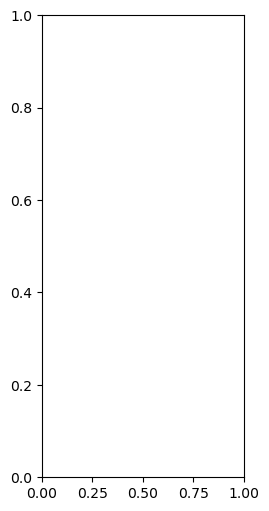

In [6]:
# print a slice from the first image of train_loader
plt.figure('check', (12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(train_ds[0]['image'][i, :, :], cmap='gray')
plt.show()

